<a href="https://colab.research.google.com/github/daniela2001-png/DATA_SCIENCE/blob/master/n-grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**¿Cómo extraer n-gramas de un texto en Python?**


---


* frecuencias de ocurrencias de n-gramas en textos

* un n-grama es ua secuencia de n palabras consecutivas

* por ejemplo:
 "hola soy daniela y quiero aprender npl" 

* (hola soy daniela) o (quiero aprender npl) o (y)

---




In [ ]:
import nltk 
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# es un matplotlib dinamico
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

# **como extraer bigramas de un texto?**
---

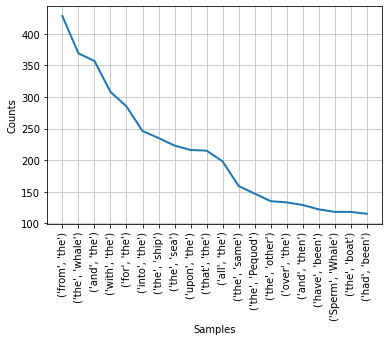

In [ ]:
#extraemos los bigramas de un texto
list_grama = list(bigrams(text1))
# luego sacamos con freqdist ls bi-gramas mas concurrentes dentro de nuestra lista
fdist = FreqDist(list_grama)
fdist.most_common(10)

#fdist.plot(10)
#ahora solo nos quedaremos con los bigramas filtrados
# aqui me aseguro de que en la tupla de palabras tanto en la posicion 0 y 1 sus caracteres sean mayores a 2 (minimo 3 chars)
filter_bigram = [bigram for bigram in list_grama if len(bigram[0]) > 2 and len(bigram[1]) > 2]
filter_bigram
# ahora haremos nuetsra distribucion ya con los bigramas filtrados :3
filter_distr = FreqDist(filter_bigram)
# por ultimo ploteo la distribucion filtrada de bigramas 
filter_distr.plot(20) # los 20 pares de palabras mas comunes de mi texto1


# **AHORA QUE VENGAN LOS TRIGRAMAS :3**
---
* la importacion de nltk cambia ya que usaremos la generalidad de n-grams osea cuando llamemos a n-grams le pasamos el # de grams que queremos sacar por tokens del texto en este caso seran de 3!
---


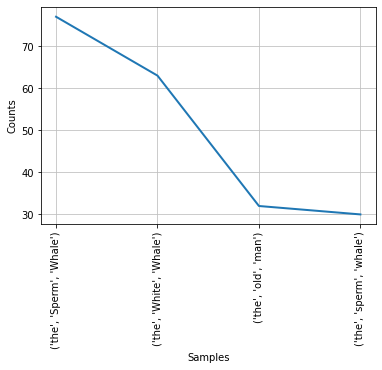

In [ ]:
from nltk.util import ngrams
import re
trigrama = list(ngrams(text1, 3))
#trigrama # nuestra tuple de 3 indices
# again le sacamos la distribucion a los 10 trigamas +top
filtered = [trigram for trigram in trigrama if re.search("[a-z0-9]", trigram[0]) and re.search("[a-z0-9]", trigram[1]) and re.search("[a-z0-9]", trigram[2]) and len(trigram[0]) > 2 and len(trigram[1]) > 2 and len(trigram[2]) > 2]
filtered
fdist = FreqDist(filtered)
fdist.most_common(4)
fdist.plot(4)


# **colocaciones palabras mas repetidas en un texto**
---
* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra

In [ ]:
#extraemos los bigramas de un texto
list_grama = list(bigrams(text1))
lista_filter = [gram for gram in list_grama if len(gram[0]) > 2 and len(gram[1]) > 2]
fdist_total = FreqDist(lista_filter)

#ahors para poder hacer el PMI necesito sacar distirbucion de las palabras como tal del texto
filter_words = [word for word in text1 if len(word) > 2]
fdist = FreqDist(filter_words)

# ahora vamos a crear un df
df = pd.DataFrame()
df["bigrama"] = list(set(lista_filter))
df["word_0"] = df["bigrama"].apply(lambda x: x[0])
df["word_1"] = df["bigrama"].apply(lambda x: x[1])
# definimos las columnas de frecuencias la total(todo el bigrama) la word_0 y la word_1
df["freq_total"] = df["bigrama"].apply(lambda x: fdist_total[x])
df["freq_0"] = df["bigrama"].apply(lambda x: fdist[x[0]])
df["freq_1"] = df["bigrama"].apply(lambda x: fdist[x[1]])

df



bigrama      word_0  ... freq_0  freq_1
0               (the, snaky)         the  ...  13721       2
1        (entirely, because)    entirely  ...     29      73
2             (the, anxiety)         the  ...  13721       3
3               (study, out)       study  ...      7     529
4      (cannibally, carving)  cannibally  ...      1       6
...                      ...         ...  ...    ...     ...
67937           (there, put)       there  ...    715      72
67938        (keep, himself)        keep  ...     66     203
67939        (remotest, and)    remotest  ...     10    6024
67940     (were, sauntering)        were  ...    680       4
67941            (his, work)         his  ...   2459      62

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$
* donde el numerador contiene la probabilidad de que se encuentre ese bigrama(word_0, word_1) esto es proporcional a la frecuencia de aparición
* donde le denominador contiene la multiplicacion de probailidad de sacar la word_0  y la probabiliadad de sacar la word_1
---


In [ ]:
"""
Las colocaciones de una palabra
son sentencias que indican los
lugares que acostumbra a tomar
esa palabra en el lenguaje (sin
seguir las reglas del lenguaje)
"""
# ahora vamos a sacra el pmi a cada bigrama osea a cada fila en el df :3
df["PMI"] = df[["freq_total", "freq_0", "freq_1"]].apply(lambda x : np.log2(x.values[0] / x.values[1] * x.values[2]), axis=1)
df

bigrama      word_0      word_1  ...  freq_0  freq_1        PMI
0               (the, snaky)         the       snaky  ...   13721       2 -12.744098
1        (entirely, because)    entirely     because  ...      29      73   1.331844
2             (the, anxiety)         the     anxiety  ...   13721       3 -12.159136
3               (study, out)       study         out  ...       7     529   6.239769
4      (cannibally, carving)  cannibally     carving  ...       1       6   2.584963
...                      ...         ...         ...  ...     ...     ...        ...
67937           (there, put)       there         put  ...     715      72  -3.311874
67938        (keep, himself)        keep     himself  ...      66     203   2.620942
67939        (remotest, and)    remotest         and  ...      10    6024  10.819540
67940     (were, sauntering)        were  sauntering  ...     680       4  -7.409391
67941            (his, work)         his        work  ...    2459      62  -3.309660

[67942 rows x 7 columns]

In [ ]:
# los valores de PMI mas grandes son los mas cercanos a cero o son cero la mayoria dan negativos ya que al divir dentro de un log y este valor es menoa a 1 el log dara negativo :3
df.sort_values(by ="PMI", ascending=False)
df


bigrama      word_0      word_1  ...  freq_0  freq_1        PMI
0               (the, snaky)         the       snaky  ...   13721       2 -12.744098
1        (entirely, because)    entirely     because  ...      29      73   1.331844
2             (the, anxiety)         the     anxiety  ...   13721       3 -12.159136
3               (study, out)       study         out  ...       7     529   6.239769
4      (cannibally, carving)  cannibally     carving  ...       1       6   2.584963
...                      ...         ...         ...  ...     ...     ...        ...
67937           (there, put)       there         put  ...     715      72  -3.311874
67938        (keep, himself)        keep     himself  ...      66     203   2.620942
67939        (remotest, and)    remotest         and  ...      10    6024  10.819540
67940     (were, sauntering)        were  sauntering  ...     680       4  -7.409391
67941            (his, work)         his        work  ...    2459      62  -3.309660

[67942 rows x 7 columns]

In [ ]:
# ENTONCES AHOAR QUEREMOS SABER COMO QUEDARO EL PLOT DE X VS Y SABIENDO QUE X ES = PMI Y Y= FRECUENCIA DEL BIGRAMA
# USAREMOS PLOTLY PARES PODER HACER ESTO
# NOTA : PARA PODER GRAFICAR ESTOS DOS TIPOS ODE DATOS LOS DOS DEBEN ESTAR POR DECIRLO ASI A LA MISMA ESCALA EN NUESTRO CASO EL PMI ESTA EN ESCALA LOGARITMICA POR LO TANTO NUESTRA FRECUENCIA BIGRAMAL TAMBIEN DEBE ESTARLO ESO ES LO QUE HAREMOS EN NEXT LINE OF CODE :3
df["log(freq_bigramal)"] = df["freq_total"].apply(lambda x: np.log(x))
df


bigrama      word_0  ...        PMI  log(freq_bigramal)
0               (the, snaky)         the  ... -12.744098            0.000000
1        (entirely, because)    entirely  ...   1.331844            0.000000
2             (the, anxiety)         the  ... -12.159136            0.000000
3               (study, out)       study  ...   6.239769            0.000000
4      (cannibally, carving)  cannibally  ...   2.584963            0.000000
...                      ...         ...  ...        ...                 ...
67937           (there, put)       there  ...  -3.311874            0.000000
67938        (keep, himself)        keep  ...   2.620942            0.693147
67939        (remotest, and)    remotest  ...  10.819540            1.098612
67940     (were, sauntering)        were  ...  -7.409391            0.000000
67941            (his, work)         his  ...  -3.309660            1.386294

[67942 rows x 8 columns]

In [ ]:
# ahora grafiquemos estos dos ejes en una grafico de dispersion donde cada punto representa un bigrama con coordenadas PMI y log(freq_total) :3
fig = px.scatter(x=df["PMI"].values, y=df["log(freq_bigramal)"].values, hover_name=df["bigrama"], color=df["log(freq_bigramal)"]+df["PMI"], width=600, height=600, labels={'x':"PMI(colocación)", 'y':"Log(Frecuencia de aparcion de un bigrama)"})
fig.show()

# **Ahora usaremos las las medidas pre-construidas por NLTK**
---


In [ ]:
from nltk.collocations import *

# aqui calculamos una de las metricas el (pmi)
pmi = nltk.collocations.BigramAssocMeasures()
#encontramos las colocaciones del texto1
finder = BigramCollocationFinder.from_words(text1)
# filtramos las colocaciones donde su frecunecia sea mayor a 20
finder.apply_freq_filter(20)
# coloquemos las mejores colocaciones o candidatos
# el 1er argumento que toma nbest es el pmi y luego la cantidad de colocaciones que queremos saber como el top 10
finder.nbest(pmi.pmi, 10)


[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# **ahora usaremos un corpus en español**
---


In [ ]:
nltk.download("cess_esp")
corpus = nltk.corpus.cess_esp.sents()
lista = [w for l in corpus for w in l]
lista[:10]


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',']

In [ ]:
# hacemos un finder de collocations luego la hecmos un filter pero como un documnet ya que tenemos un corpus
pmi = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(pmi.pmi, 10)


[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

# **recursos lexicos con nltk**
---

*   Son colecciones de palabras o frases que tienen asociadas etiquetas o meta-informacion de algún tipo (POS tags, significados gramaticales, etc ...)

**comentario:** POS (Part of Speech), también llamado etiquetado gramatical o etiquetado de palabras por categorias, consiste en etiquetar la categoria gramatical a la que pertence cada palabra en un volumen de texto, siendo las categorias: 

1.   Sustantivos
2.   Adjetivos
3.   Articulos
4.   Pronombres
5.   Verbos
6.   Adverbios
7.   Interjecciones
8.   Preposiciones
9.   Conjunciones
---

In [ ]:
import  nltk
nltk.download("book")
from nltk.book import *
# importamos stopwords que es un recurso lexico!
from nltk.corpus import stopwords


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
# vocabulario . palabras unicas en un corpus
# el vocabulario es un lexicon NO ENRIQUECIDO YA QUE NO TIENE INFORMACION DE LAS PALABRAS (ENTRADA LEXICA)
vocabulario = sorted(set(text1))
vocabulario


['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...',
 '";',
 '$',
 '&',
 "'",
 "',",
 "',--",
 "'-",
 "'--",
 "';",
 '(',
 ')',
 '),',
 ')--',
 ').',
 ').--',
 '):',
 ');',
 ');--',
 '*',
 ',',
 ',"',
 ',"--',
 ",'",
 ",'--",
 ',)',
 ',*',
 ',--',
 ',--"',
 ",--'",
 '-',
 '--',
 '--"',
 "--'",
 '--\'"',
 '--(',
 '---"',
 '---,',
 '.',
 '."',
 '."*',
 '."--',
 ".'",
 '.\'"',
 '.)',
 '.*',
 '.*--',
 '.,',
 '.--',
 '.--"',
 '...',
 '....',
 '.]',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775

In [ ]:
#Distribuciones : frecuencia de aparicion
#freqdist nosa d informacion acreca del entrada lexica no solo es key:(frecuencia de key)
# LAS DISTRIBUCIONES SON LEXIOCNES QUE SI SON ENRIQUECIDORAS YA QUE NOSA DA INFORMACION ACERCA DE LAS ENTRADAS
frecuencia_n_grama = FreqDist(text1)
frecuencia_n_grama


FreqDist({'[': 3,
          'Moby': 84,
          'Dick': 84,
          'by': 1137,
          'Herman': 1,
          'Melville': 1,
          '1851': 3,
          ']': 1,
          'ETYMOLOGY': 1,
          '.': 6862,
          '(': 210,
          'Supplied': 2,
          'a': 4569,
          'Late': 1,
          'Consumptive': 1,
          'Usher': 2,
          'to': 4542,
          'Grammar': 2,
          'School': 1,
          ')': 78,
          'The': 612,
          'pale': 18,
          '--': 1070,
          'threadbare': 1,
          'in': 3916,
          'coat': 28,
          ',': 18713,
          'heart': 90,
          'body': 110,
          'and': 6024,
          'brain': 37,
          ';': 4072,
          'I': 2124,
          'see': 253,
          'him': 1058,
          'now': 646,
          'He': 230,
          'was': 1632,
          'ever': 203,
          'dusting': 2,
          'his': 2459,
          'old': 436,
          'lexicons': 1,
          'grammars': 2,
          '

In [ ]:
#stopwords : son las palabras como articulos conectores etc ... que terminan siendo basura por lo tanto debemos filtrar estas stop words usando regex uwu
#aqui puedes ver las stopwords del lenguaje español
stopwords.words("spanish")


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
#ahora crearemos una funcion que no retornar el porcentaje total de stopwords que contiene nuestro texto  a procesar... por qué hacemos esto?
# bueno lo hacemos porque tal vez nuestro texto enorme aprocesar este lleno de estas palabras basura y pues aja la decepcion la traicion hermano
def porcentaje_stop_words(text):
  stopword = stopwords.words("english")
  filter_words = [word for word in text if word.lower() not in stopword] # aqui convertimos cada palabra a minuscula y verificamos o filtramos que no este en las stopwords
  return len(filter_words)/len(text)

porcentaje_stop_words(text1)
# el 58% de las palabras son stopwords


0.5862954769399469

# ***NLTK para traducción de palabras***

> *   Construyendo diccionarios para traduccion de palabras en diferentes idiomas. 
---




In [ ]:
from nltk.corpus import swadesh
swadesh.fileids()# imprimo idiomas ("en") etc ..

# traducciones de frances a español
fr_to_sp = swadesh.entries(["fr", "es"])
fr_to_sp
# ahora convertimos es eobjeto de fr_tosp haremosn un dict
translate = dict(fr_to_sp)
translate["nous"]


'nosotros'

# ***INTRO A WORDNET***
---


In [ ]:
import nltk
nltk.download("omw")
nltk.download("wordnet")

from nltk.corpus import wordnet as wn


[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# synsets : grupo de sinomos
# ahora checekamos los synsets de por ejemplo carro:
sinonimo = wn .synsets("carro", lang="spa")
sinonimo

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [ ]:
# miranmos las definciones a partir del nombre de cada sinset
for syn in sinonimo:
  print(syn.name() +" : " +syn.definition())
  # este for me dara las palabras que pertenecen a detrminaod synset 
  for name in syn.lemma_names():
    print(" * " + name)



car.n.01 : a motor vehicle with four wheels; usually propelled by an internal combustion engine
 * car
 * auto
 * automobile
 * machine
 * motorcar
carriage.n.04 : a machine part that carries something else
 * carriage
carrier.n.02 : a self-propelled wheeled vehicle designed specifically to carry something
 * carrier
cart.n.01 : a heavy open wagon usually having two wheels and drawn by an animal
 * cart
chariot.n.02 : a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 * chariot
cartload.n.01 : the quantity that a cart holds
 * cartload


In [ ]:
#hiponimos : sinonimos de un synset
sinonimo[0].hyponyms()

#hperonimo: concepto global del sinset
sinonimo[0].hypernyms()


[Synset('motor_vehicle.n.01')]

In [ ]:
#ahora vamos a hacer un grafo de synsets
import networkx as nx
import matplotlib.pyplot as plt

def clousure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)
  recurse(synset)
  return graph, labels

def draw_text_graph(G, labels):
  plt.figure(figsize=(18, 12))
  pos = nx.planar_layout(G, scale=18)
  nx.draw_networkx_nodes(G, pos, node_color="pink", linewidths=0, node_size=500)
  nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
  nx.draw_networkx_edges(G, pos)
  plt.xticks([])
  plt.yticks([])

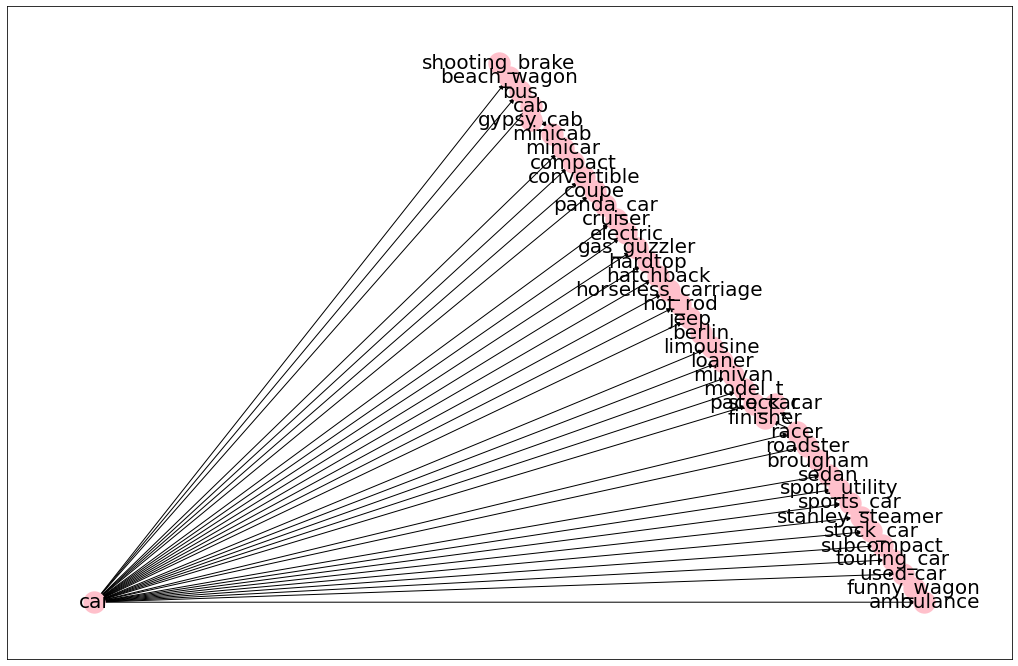

In [ ]:
# ahora con el codigo anterior usaremos las 2 funciones anteriores 
# graficamos el grafo de los hiponimos del synset[0] == car.o1
G, labels = clousure_graph(sinonimo[0], fn= lambda synset: synset.hyponyms())
draw_text_graph(G, labels)

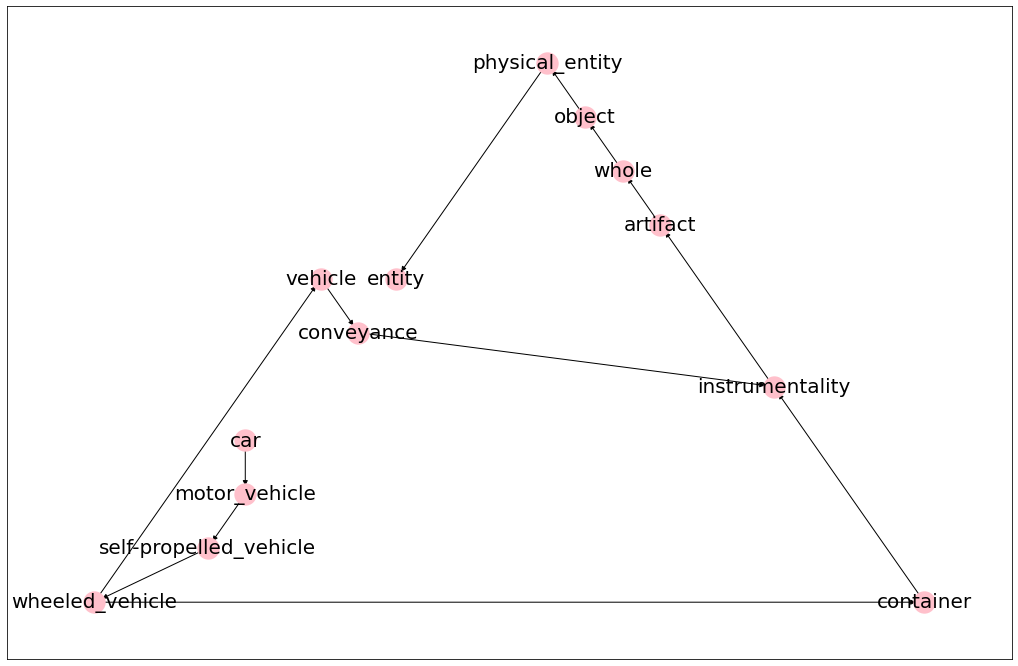

In [ ]:
# ahora con el codigo anterior usaremos las 2 funciones anteriores 
# graficamos el grafo de los hiperonimo del synset[0] == car.o1
G, labels = clousure_graph(sinonimo[0], fn= lambda synset: synset.hypernyms())
draw_text_graph(G, labels)

# ***SIMILITUD SEMANTICA CON WORDNET***
---
 vamos a calcular las distancias entre los sinonimos de un synset

In [ ]:
#creamos una funcion que crea la lista de synsets la recorremos impirmos los nombres y sus definiciones de cada synset en español
def show_syns(word):
  ss = wn.synsets(word, lang='spa')
  for syn in ss:
    print(syn.name(), ': ', syn.definition())
    for name in syn.lemma_names():
      print(' * ', name)
  return ss

In [ ]:
ss = show_syns('perro')


dog.n.01 :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01 :  a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [ ]:
ss2 = show_syns('gato')

cat.n.01 :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02 :  male cat
 *  tom
 *  tomcat
dodger.n.01 :  a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [ ]:
ss3 = show_syns('animal')

animal.n.01 :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02 :  a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01 :  a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [ ]:
# creamos nuestro synsets
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

In [ ]:
# ahora calculamos las distancias entre los synsets 
# calculamos la distancia entre nodos o vertices que vendrian los synsets
animal.path_similarity(perro)
animal.path_similarity(gato)

0.125

In [ ]:
perro.path_similarity(perro)

1.0

* ahora las medidas varian como vimos anteriormente cuando la salida es 1 queire decir que es el mismo synset pero si tiende a cero 0 entonces podemos concluir que los synsets son muy distintos
---
* por lo tanto en la semantica en español e ingles gato esta mas lejos del synset animal que el synset perro


# ***SALU2 :3***